## Final Project
#### Names: Sammy Park and Victoria Ok

#### Spotify Tracks Dataset from huggingface.co
(https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset)

#### Data Description:
The dataset comprises information on various music tracks available on Spotify, encompassing diverse attributes such as artist details, album names, track names, popularity scores, duration, explicit content, and musical traits like danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time signature, and track genre. The popularity score, ranging from 0 to 100, is algorithmically determined based on the track's play count and recency. Additionally, the dataset includes details about the presence of explicit lyrics, dance suitability, acoustic nature, instrumental content, live performance likelihood, and the emotional tone conveyed by each track. 

#### Key Variables:
- track_genre: The genre in which the track belongs

#### Question: 
Can we predict the popularity of songs within specific genres, considering genre-specific traits?

#### Basic Information about the Data:
- size: 17.5+ MB
- number of entries (rows): 114,000
- number of features (columns): 21
- number of categorical columns: 6
- number of numerical columns: 15
- columns with missing values: ```artists, album_name, track_name```

In [1]:
### Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# libraries for data pre-processing
from sklearn.preprocessing import OrdinalEncoder

# Libraries for kMeans clustering
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
### Load and preview the dataset
spotify = pd.read_csv("C:/Users/victo/Downloads/Yr. 4 Sem. 1/DS 3001 FML/final_project/dataset.csv")
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [3]:
# drop the index column, as it is not necessary
# drop the track_id column because it is a unique identifier 
spotify = spotify.drop(['index', 'track_id'], axis=1)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

In [4]:
# convert 'duration_ms' into 'duration_sec' (ms to s) for user readability
spotify['duration_sec'] = spotify['duration_ms']/1000
spotify = spotify.drop(['duration_ms'], axis=1)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   explicit          114000 non-null  bool   
 5   danceability      114000 non-null  float64
 6   energy            114000 non-null  float64
 7   key               114000 non-null  int64  
 8   loudness          114000 non-null  float64
 9   mode              114000 non-null  int64  
 10  speechiness       114000 non-null  float64
 11  acousticness      114000 non-null  float64
 12  instrumentalness  114000 non-null  float64
 13  liveness          114000 non-null  float64
 14  valence           114000 non-null  float64
 15  tempo             114000 non-null  float64
 16  time_signature    11

In [5]:
# see how many categories exist in track_genre
spotify["track_genre"].value_counts()

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64

In [6]:
# convert 'track_genre' into a category type
spotify["track_genre"] = spotify["track_genre"].astype("category")

In [7]:
# One hot encoding popularity 
ordinal_encoder = OrdinalEncoder()
spotify[['track_genre']] = ordinal_encoder.fit_transform(spotify[['track_genre']])
spotify[['track_genre']].value_counts()

track_genre
0.0            1000
85.0           1000
83.0           1000
82.0           1000
81.0           1000
               ... 
34.0           1000
33.0           1000
32.0           1000
31.0           1000
113.0          1000
Name: count, Length: 114, dtype: int64

In [8]:
# view the categories
ordinal_encoder.categories_

[array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
        'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
        'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
        'chill', 'classical', 'club', 'comedy', 'country', 'dance',
        'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
        'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
        'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
        'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
        'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
        'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
        'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol',
        'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
        'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
        'new-age', 'opera', 'pagode', 'party', 'piano', 'pop', 'pop-film

In [9]:
# view the null rows
spotify[spotify.isna().any(axis=1)]

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_sec
65900,NaN,NaN,NaN,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,65.0,0.0


In [10]:
# drop the one value that has null values
spotify = spotify.dropna()
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   explicit          113999 non-null  bool   
 5   danceability      113999 non-null  float64
 6   energy            113999 non-null  float64
 7   key               113999 non-null  int64  
 8   loudness          113999 non-null  float64
 9   mode              113999 non-null  int64  
 10  speechiness       113999 non-null  float64
 11  acousticness      113999 non-null  float64
 12  instrumentalness  113999 non-null  float64
 13  liveness          113999 non-null  float64
 14  valence           113999 non-null  float64
 15  tempo             113999 non-null  float64
 16  time_signature    113999 

In [11]:
# output basic statistics
spotify.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_sec
count,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034,56.499925,228.031153
std,22.304959,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623,32.907978,107.296058
min,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.586000
25%,17.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000,28.000000,174.066000
50%,35.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,56.000000,212.906000
75%,50.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000,85.000000,261.506000
max,100.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,113.000000,5237.295000


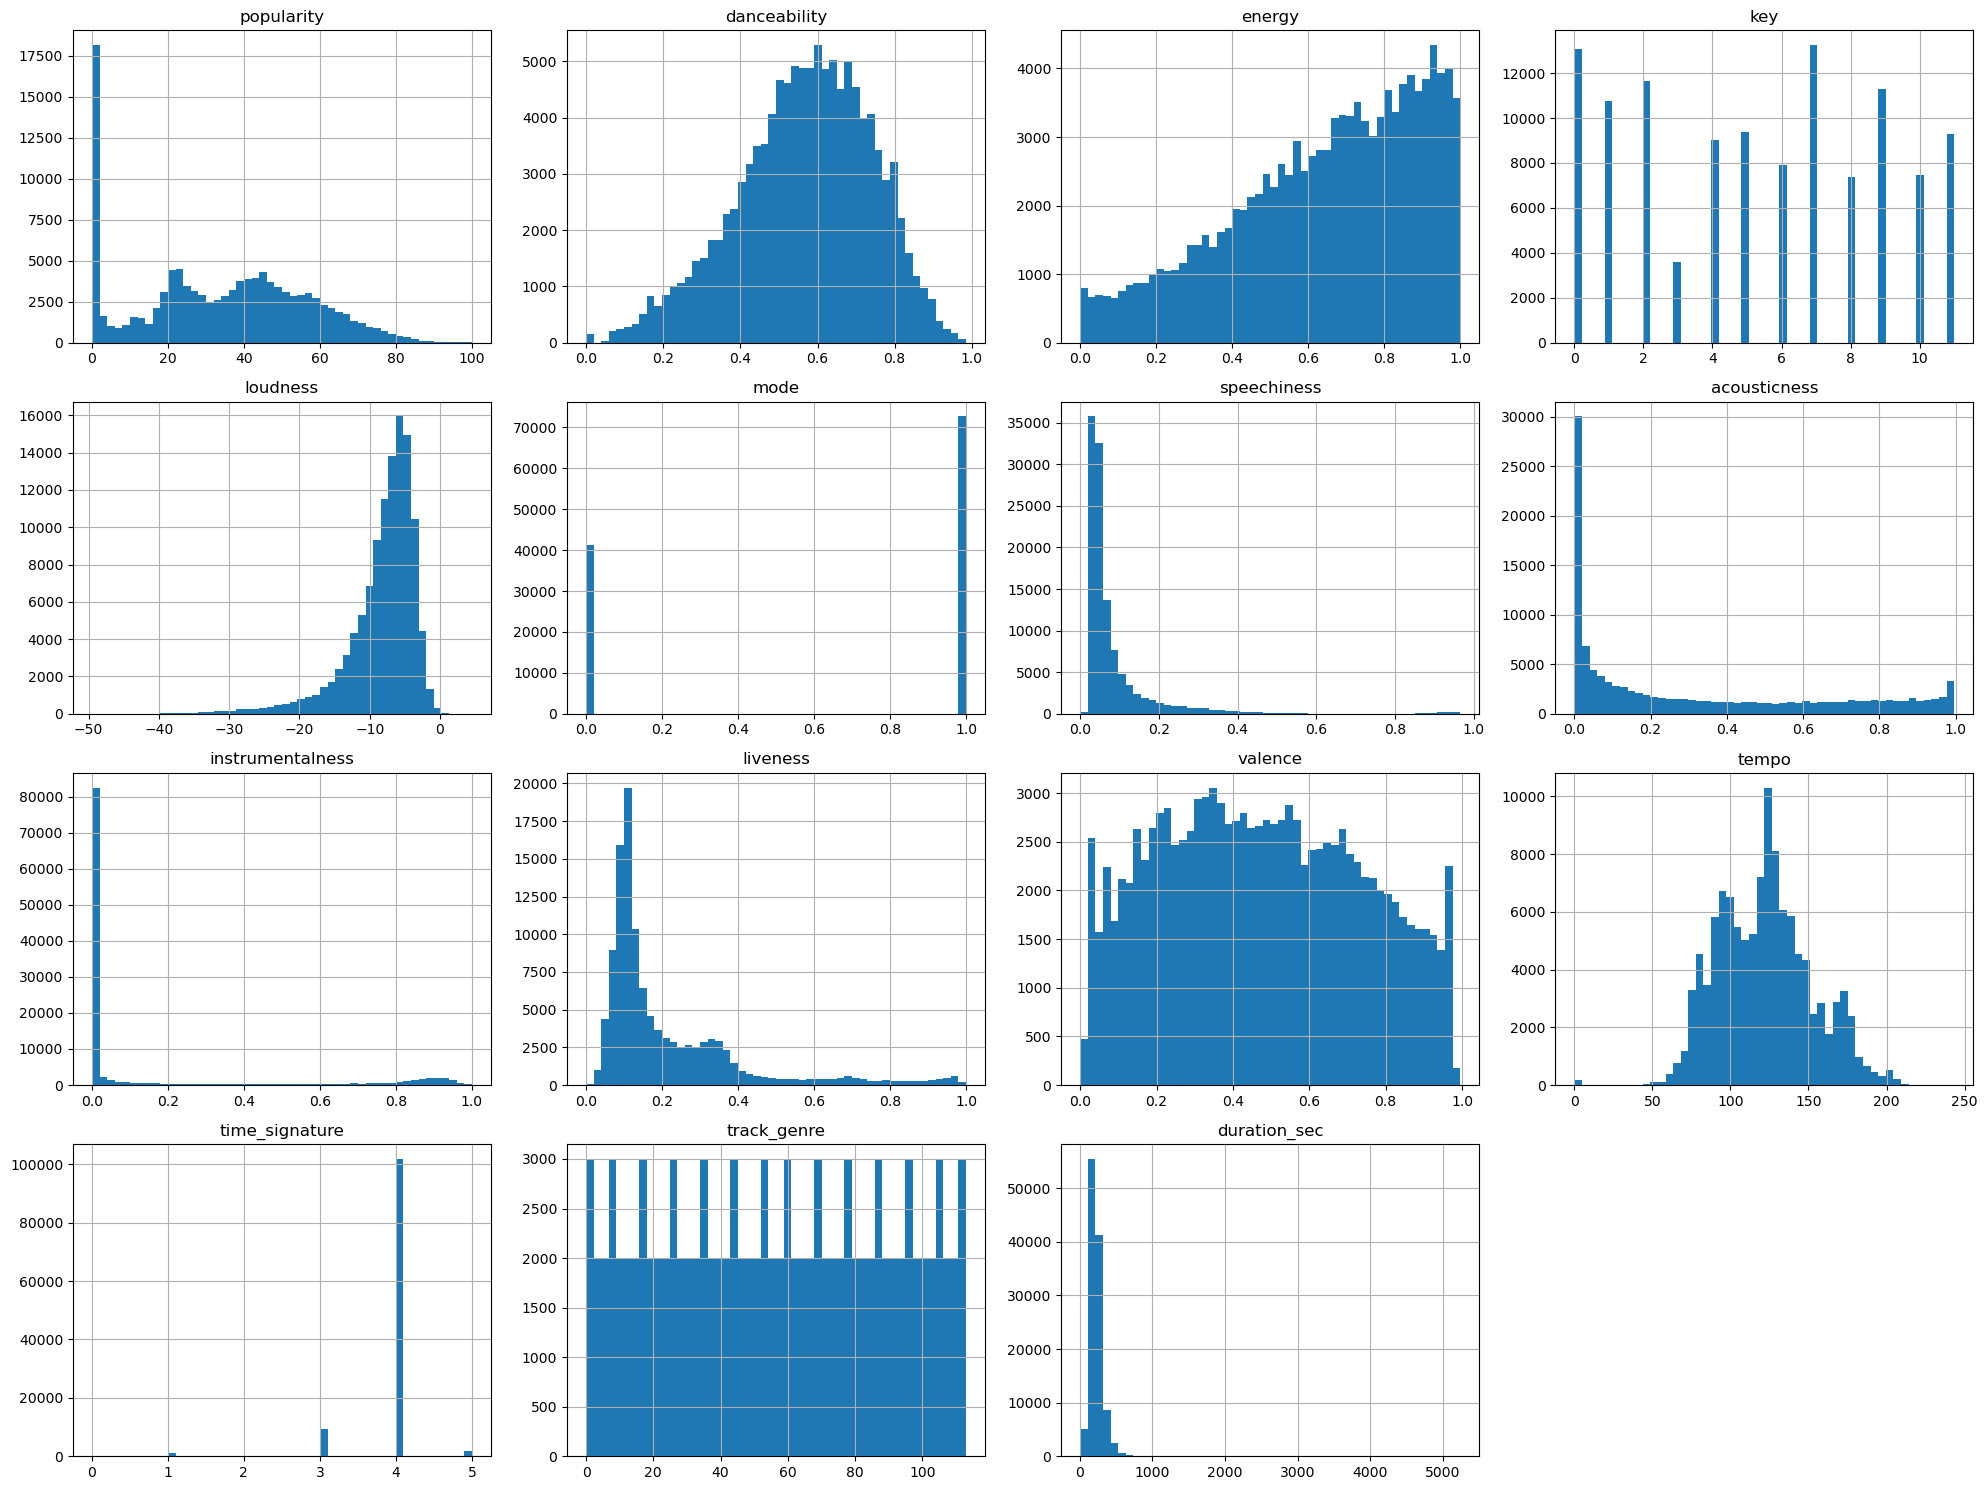

In [12]:
# visualize numerical data as histograms
spotify.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [13]:
# viewing the histogram, we saw that many songs had a popularity of 0, and wanted to investigate
low_pop = spotify[(spotify['popularity']==0)]
low_pop

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_sec
23,Jason Mraz,Coffee Moment,93 Million Miles,0,False,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4,0.0,216.386
24,Jason Mraz,Human - Best Adult Pop Tunes,Unlonely,0,False,0.796,0.667,5,-4.831,0,0.0392,0.3810,0.000000,0.2210,0.754,97.988,4,0.0,231.266
26,Jason Mraz,Holly Jolly Christmas,Winter Wonderland,0,False,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,0.0,131.760
27,Jason Mraz,Feeling Good - Adult Pop Favorites,If It Kills Me,0,False,0.633,0.429,4,-6.784,0,0.0381,0.0444,0.000000,0.1320,0.520,143.793,4,0.0,273.653
28,Jason Mraz,Christmas Time,Winter Wonderland,0,False,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,0.0,131.760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113046,Rend Collective,Santa's Christmas List,Ding Dong Merrily On High (The Celebration's S...,0,False,0.696,0.715,7,-7.741,1,0.0314,0.3400,0.000000,0.1800,0.959,130.021,4,113.0,117.226
113047,Kim Walker-Smith,Santa's Christmas List,Rudolph The Red-Nosed Reindeer,0,False,0.581,0.436,8,-7.936,1,0.0443,0.2320,0.000000,0.0547,0.412,120.138,4,113.0,175.426
113048,Kim Walker-Smith,Santa's Christmas List,I'll Be Home For Christmas,0,False,0.413,0.437,1,-7.983,0,0.0327,0.0420,0.000036,0.1460,0.102,120.259,4,113.0,193.653
113049,Rend Collective;We The Kingdom,Santa's Christmas List,God Rest Ye Merry Gentlemen (Hallelujah),0,False,0.607,0.884,2,-4.059,1,0.0489,0.0230,0.000000,0.2260,0.555,139.988,4,113.0,217.120


Viewing the statistics of our target variable, we want to categorize the popularity variable into 3 classes: low, average, and high popularity. After calculating the mean to be a score 33.239 and the standard deviation to be 22.305, we separate the classes by one standard deviation below and above the mean rounded down - [10, 55]. 

In [14]:
# Factoring popularity to 3 levels of low, average, and high
spotify['popularity'] = pd.cut(spotify['popularity'], bins=[0, 10, 55, 100], labels=['low', 'average', 'high'], right=False)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   artists           113999 non-null  object  
 1   album_name        113999 non-null  object  
 2   track_name        113999 non-null  object  
 3   popularity        113997 non-null  category
 4   explicit          113999 non-null  bool    
 5   danceability      113999 non-null  float64 
 6   energy            113999 non-null  float64 
 7   key               113999 non-null  int64   
 8   loudness          113999 non-null  float64 
 9   mode              113999 non-null  int64   
 10  speechiness       113999 non-null  float64 
 11  acousticness      113999 non-null  float64 
 12  instrumentalness  113999 non-null  float64 
 13  liveness          113999 non-null  float64 
 14  valence           113999 non-null  float64 
 15  tempo             113999 non-null  float64 
 16  time_si

In [15]:
spotify = spotify.dropna()
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113997 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   artists           113997 non-null  object  
 1   album_name        113997 non-null  object  
 2   track_name        113997 non-null  object  
 3   popularity        113997 non-null  category
 4   explicit          113997 non-null  bool    
 5   danceability      113997 non-null  float64 
 6   energy            113997 non-null  float64 
 7   key               113997 non-null  int64   
 8   loudness          113997 non-null  float64 
 9   mode              113997 non-null  int64   
 10  speechiness       113997 non-null  float64 
 11  acousticness      113997 non-null  float64 
 12  instrumentalness  113997 non-null  float64 
 13  liveness          113997 non-null  float64 
 14  valence           113997 non-null  float64 
 15  tempo             113997 non-null  float64 
 16  time_si

In [16]:
spotify[['popularity']].value_counts()

popularity
average       69279
low           22728
high          21990
Name: count, dtype: int64

In [17]:
# One hot encoding popularity 
spotify[['popularity']] = OrdinalEncoder().fit_transform(spotify[['popularity']])
spotify[['popularity']].value_counts()

popularity
0.0           69279
2.0           22728
1.0           21990
Name: count, dtype: int64

- 0 corresponds with average popularity
- 1 corresponds with high popularity
- 2 corresponds with low popularity

In [18]:
# subset of the data without the artist, album name, and track name
spotify_num = spotify.drop(columns=['artists','album_name','track_name'], axis=1)
spotify_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113997 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113997 non-null  float64
 1   explicit          113997 non-null  bool   
 2   danceability      113997 non-null  float64
 3   energy            113997 non-null  float64
 4   key               113997 non-null  int64  
 5   loudness          113997 non-null  float64
 6   mode              113997 non-null  int64  
 7   speechiness       113997 non-null  float64
 8   acousticness      113997 non-null  float64
 9   instrumentalness  113997 non-null  float64
 10  liveness          113997 non-null  float64
 11  valence           113997 non-null  float64
 12  tempo             113997 non-null  float64
 13  time_signature    113997 non-null  int64  
 14  track_genre       113997 non-null  float64
 15  duration_sec      113997 non-null  float64
dtypes: bool(1), float64(12), 

In [19]:
# Scale the data for kmeans
spotify_scaled = pd.DataFrame(MinMaxScaler().fit_transform(spotify_num))

In [28]:
# Run data through kmeans model
spotify_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(spotify_scaled)

In [21]:
# # Clustering model visualization
# fig = px.scatter_3d(spotify_scaled, x=14, y=5, color=spotify_kmeans.labels_,
#                     title="Effect of total points scored and effective field goal percentage on athlete's salary")
# fig.show()

Text(0, 0.5, 'liveness')

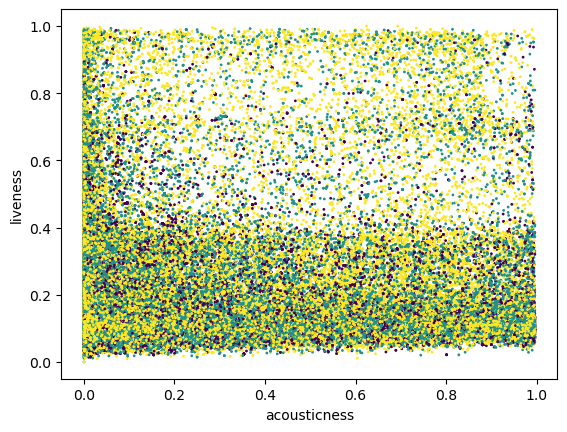

In [30]:
plt.scatter(spotify_num['acousticness'], spotify_num['liveness'], c=spotify_kmeans.labels_, s=1)
plt.xlabel("acousticness")
plt.ylabel("liveness")

In [23]:
subset = spotify_scaled[0:2000]
subset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.5,0.0,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,0.8,0.00000,0.042473
1,0.5,0.0,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,0.8,0.00000,0.026971
2,0.5,0.0,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.8,0.00000,0.038679
3,0.5,0.0,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,0.6,0.00000,0.036978
4,0.5,0.0,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.8,0.00000,0.036389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.751269,0.8660,0.181818,0.816029,1.0,0.064456,0.007118,0.051200,0.0831,0.801005,0.492990,0.8,0.00885,0.049724
1996,0.0,0.0,0.710660,0.9400,0.909091,0.790726,0.0,0.057409,0.477912,0.841000,0.1060,0.832161,0.469035,0.8,0.00885,0.056901
1997,0.0,0.0,0.773604,0.5120,1.000000,0.756488,0.0,0.247668,0.775100,0.001830,0.1830,0.578894,0.396216,0.8,0.00885,0.075940
1998,0.0,0.0,0.744162,0.8620,0.636364,0.808649,1.0,0.062591,0.288153,0.000532,0.4660,0.748744,0.443687,0.8,0.00885,0.043947


In [24]:
label = spotify_kmeans.fit_predict(subset)

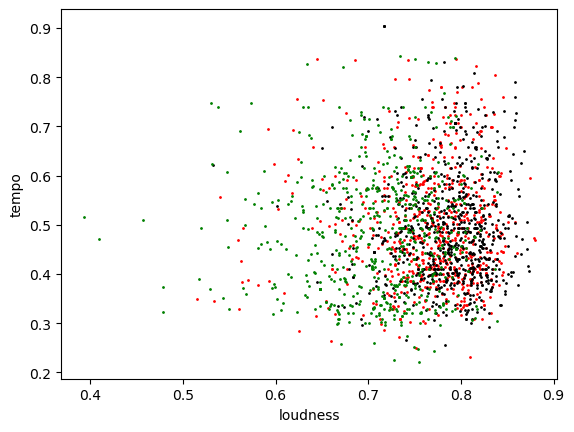

In [26]:
# filter rows of original data
filtered_average = subset[label == 0]
filtered_high = subset[label == 1]
filtered_low = subset[label == 2]

#Plotting the results
plt.scatter(filtered_average[5] , filtered_average[12] , color = 'red', s=1)
plt.scatter(filtered_high[5] , filtered_high[12] , color = 'black', s=1)
plt.scatter(filtered_low[5] , filtered_low[12] , color = 'green', s=1)
plt.xlabel("loudness")
plt.ylabel("tempo")
plt.show()

In [36]:
X_train = spotify_num.drop(columns=['popularity'], axis=1)
y_train = spotify_num['popularity']

In [34]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=1000, #<- Number of trees to grow. This should not be set to too small a number, to ensure that every input row gets predicted at least a few times.
                max_features= 4, #<- Number of variables randomly sampled as candidates at each split. Note that the default values are different for classification (sqrt(p) where p is number of variables in x) and regression (p).
                bootstrap= True, #<-Whether bootstrap samples are used when building trees
                max_samples = 100,  #<- Size of sample to draw each time.
                min_samples_leaf= 5, #<- Minimum numbers of data points in terminal nodes.
                max_leaf_nodes= None, #<- Maximum number of terminal nodes trees in the forest can have. 
                max_depth= None, #<-The maximum depth of the tree
                oob_score =True, #<-Whether to use out-of-bag samples to estimate the generalization score
                warm_start =True, #<- Whether to reuse the solution of the previous call to fit and add more estimators to the ensemble
                random_state= 1984,
                n_jobs= -1, #<- Number of cores to use for parallel processing (-1 will use all available)
                verbose=True) #<- Whether to print progress messages to stdout.

In [37]:
spotify_RFC= RFC.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.1s finished


In [38]:
y_pred = spotify_RFC.predict(X_train)
y_pred

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    3.4s finished


array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
from sklearn import metrics

print("balanced accuracy: ", metrics.balanced_accuracy_score(y_train, y_pred))

balanced accuracy:  0.3333333333333333


In [41]:
print(pd.DataFrame(spotify_RFC.feature_importances_,index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False))

                  importance
tempo               0.092290
duration_sec        0.090857
danceability        0.090572
loudness            0.090141
acousticness        0.089946
valence             0.087498
track_genre         0.082057
liveness            0.081978
energy              0.080329
speechiness         0.077207
instrumentalness    0.068709
key                 0.049379
mode                0.012349
explicit            0.004408
time_signature      0.002278


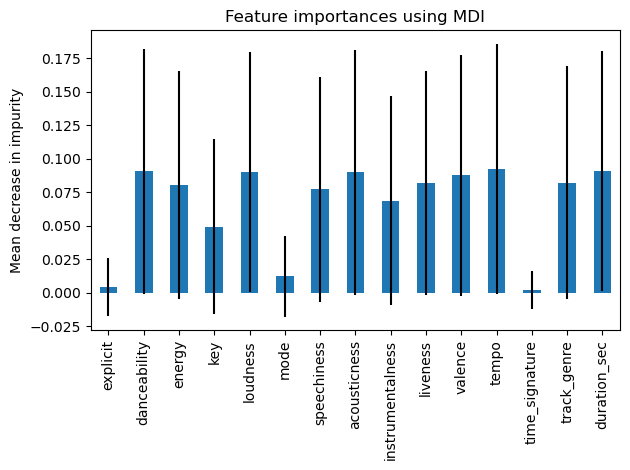

In [42]:
#Here we compute both the mean and standard
# deviation of accumulation of the impurity decrease within each tree.
importances = spotify_RFC.feature_importances_
std = np.std([tree.feature_importances_ for tree in spotify_RFC.estimators_], axis=0)

#graph it
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()